# Hotel Reservation Prediction

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

[Dataset](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

## Import Package and Load File

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

import warnings
warnings.filterwarnings('ignore')

In [177]:
df = pd.read_csv("Hotel Reservations.csv")

## Data Understanding

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [179]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [180]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [181]:
df.describe(include="O")

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


In [182]:
df.duplicated().sum()

0

In [183]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [184]:
df.sample(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
14320,INN14321,2,1,0,3,Meal Plan 1,0,Room_Type 1,51,2018,12,6,Online,0,0,0,109.80,2,Not_Canceled
4465,INN04466,2,0,0,2,Not Selected,0,Room_Type 1,85,2018,6,21,Online,0,0,0,116.10,1,Not_Canceled
20187,INN20188,2,0,0,1,Not Selected,0,Room_Type 1,1,2018,9,14,Online,0,0,0,149.00,0,Not_Canceled
28158,INN28159,2,0,2,4,Meal Plan 1,0,Room_Type 1,26,2018,10,16,Online,0,0,0,139.00,1,Not_Canceled
5635,INN05636,1,0,0,3,Meal Plan 1,0,Room_Type 1,227,2018,12,8,Online,0,0,0,72.90,0,Canceled
21249,INN21250,1,0,1,2,Meal Plan 1,0,Room_Type 1,1,2018,6,17,Offline,0,0,0,70.00,0,Not_Canceled
20576,INN20577,3,0,0,3,Meal Plan 2,0,Room_Type 1,88,2018,5,3,Offline,0,0,0,138.00,1,Not_Canceled
19206,INN19207,1,0,1,0,Not Selected,0,Room_Type 1,180,2018,10,10,Online,0,0,0,98.10,1,Not_Canceled
5201,INN05202,2,0,0,1,Not Selected,0,Room_Type 1,21,2018,9,29,Online,0,0,0,99.33,1,Not_Canceled
18620,INN18621,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,2,19,Corporate,0,0,0,80.00,0,Not_Canceled


## Exploratory Data Analysis

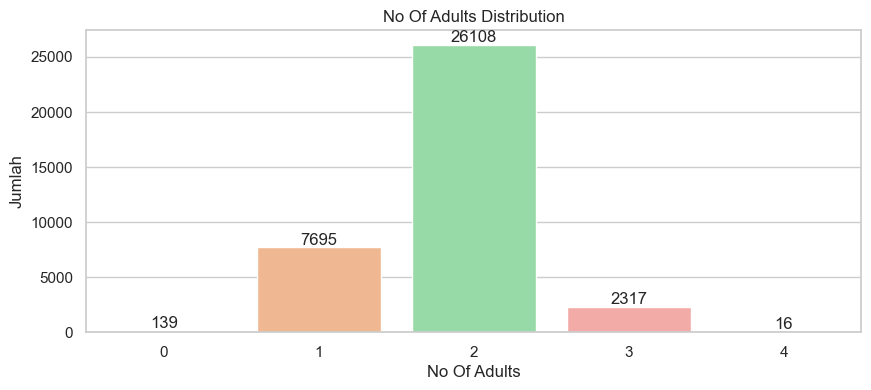

In [10]:
plt.figure(figsize= (10,4), dpi=100)
a = sns.countplot(df.no_of_adults)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("No Of Adults Distribution")
plt.xlabel("No Of Adults")
plt.ylabel("Jumlah")
plt.show()

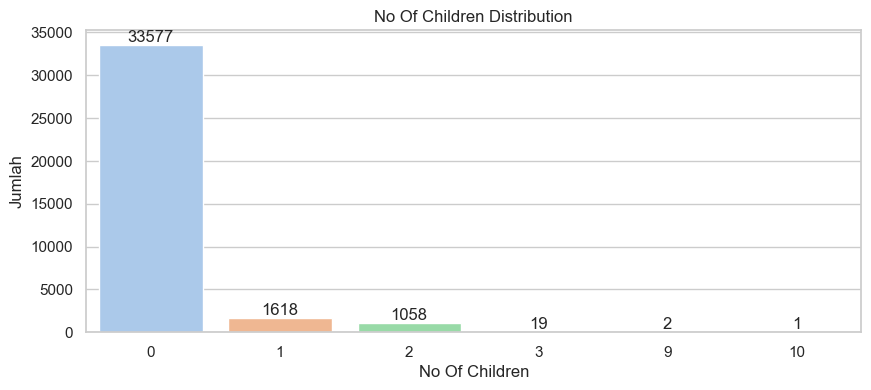

In [11]:
plt.figure(figsize= (10,4), dpi=100)
a = sns.countplot(df.no_of_children)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("No Of Children Distribution")
plt.xlabel("No Of Children")
plt.ylabel("Jumlah")
plt.show()

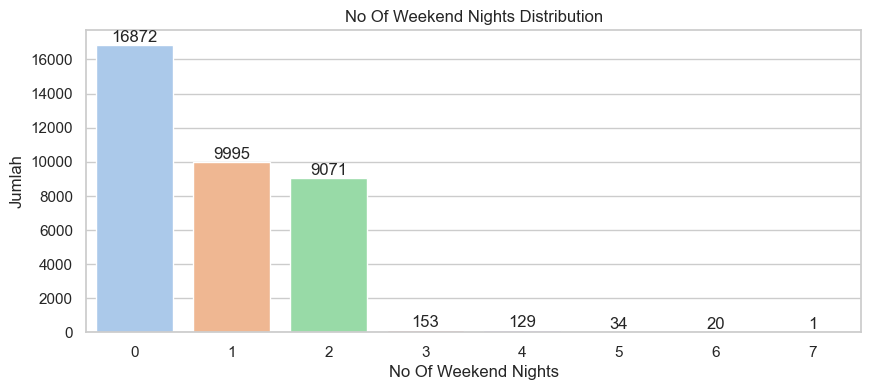

In [12]:
plt.figure(figsize= (10,4), dpi=100)
a = sns.countplot(df.no_of_weekend_nights)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("No Of Weekend Nights Distribution")
plt.xlabel("No Of Weekend Nights")
plt.ylabel("Jumlah")
plt.show()

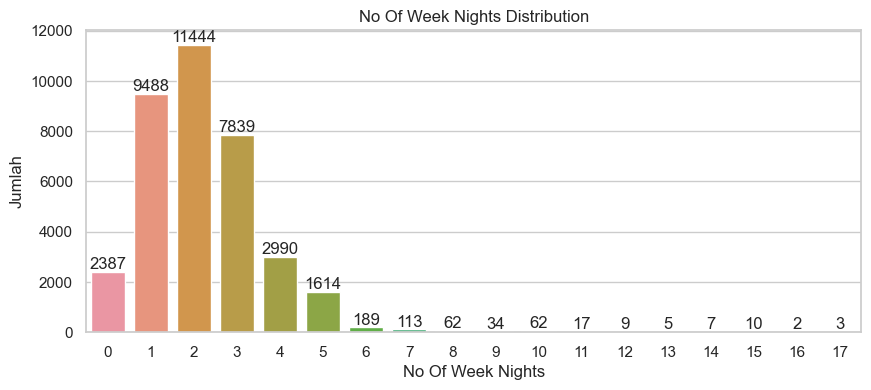

In [13]:
plt.figure(figsize= (10,4), dpi=100)
a = sns.countplot(df.no_of_week_nights)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("No Of Week Nights Distribution")
plt.xlabel("No Of Week Nights")
plt.ylabel("Jumlah")
plt.show()

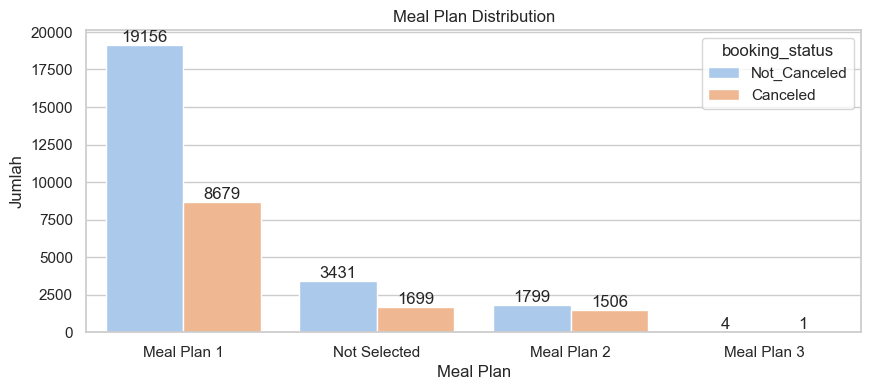

In [14]:
plt.figure(figsize= (10,4), dpi=100)
a = sns.countplot(df.type_of_meal_plan, hue=df.booking_status)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("Meal Plan Distribution")
plt.xlabel("Meal Plan")
plt.ylabel("Jumlah")
plt.show()

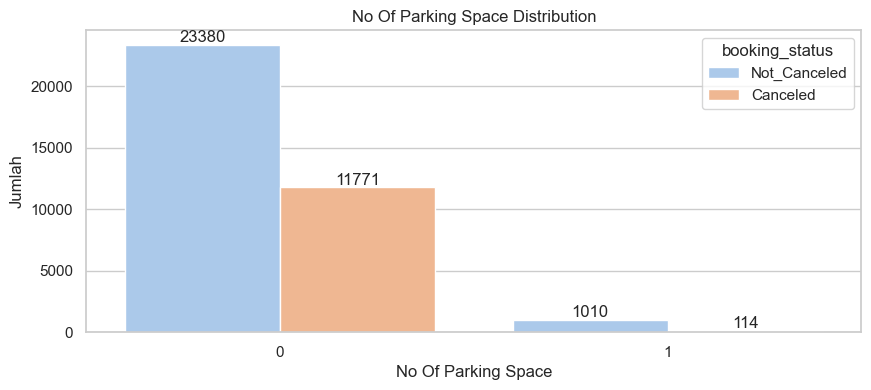

In [15]:
plt.figure(figsize= (10,4), dpi=100)
a = sns.countplot(df.required_car_parking_space, hue=df.booking_status)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("No Of Parking Space Distribution")
plt.xlabel("No Of Parking Space")
plt.ylabel("Jumlah")
plt.show()

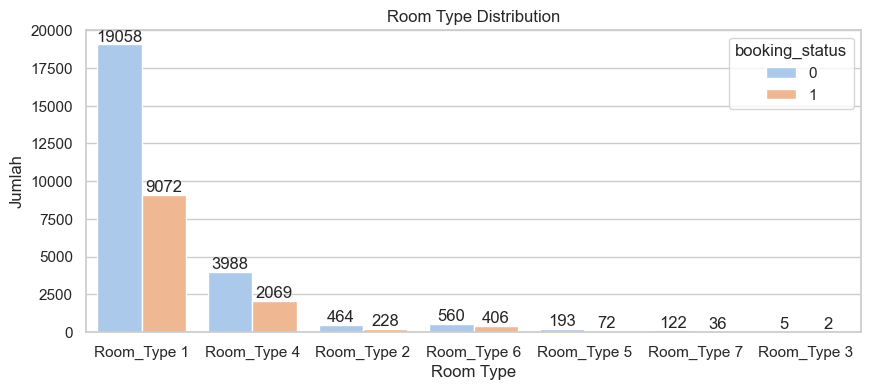

In [173]:
plt.figure(figsize= (10,4), dpi=100)
a = sns.countplot(df.room_type_reserved, hue=df.booking_status)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Jumlah")
plt.show()                    

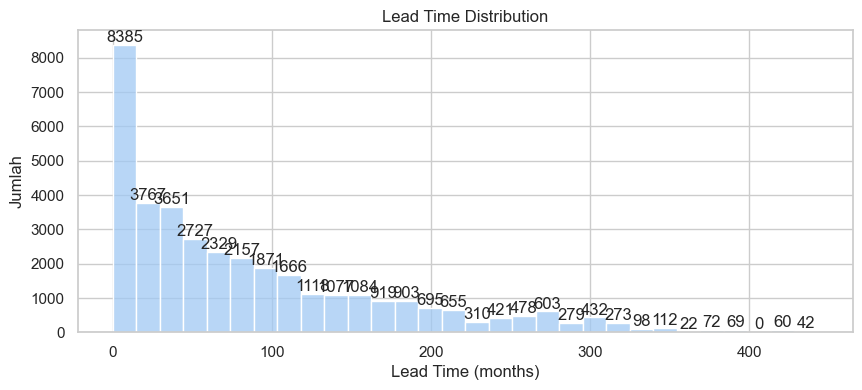

In [17]:
# df.info()
plt.figure(figsize= (10,4), dpi=100)
a = sns.histplot(df.lead_time, bins=30)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("Lead Time Distribution")
plt.xlabel("Lead Time (months)")
plt.ylabel("Jumlah")
plt.show()                    

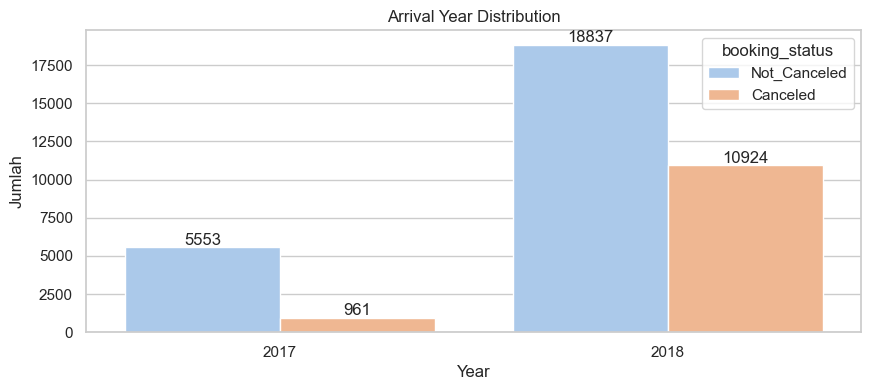

In [18]:
plt.figure(figsize= (10,4), dpi=100)
a = sns.countplot(df.arrival_year, hue=df.booking_status)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("Arrival Year Distribution")
plt.xlabel("Year")
plt.ylabel("Jumlah")
plt.show()                    

# 10  arrival_month                     
#  11  arrival_date

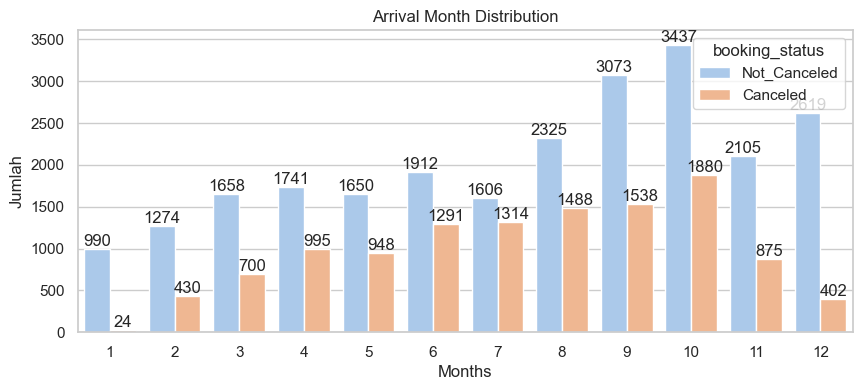

In [19]:
plt.figure(figsize= (10,4), dpi=100)
a = sns.countplot(df.arrival_month, hue=df.booking_status)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("Arrival Month Distribution")
plt.xlabel("Months")
plt.ylabel("Jumlah")
plt.show()                    

# 10                       
#  11  arrival_date

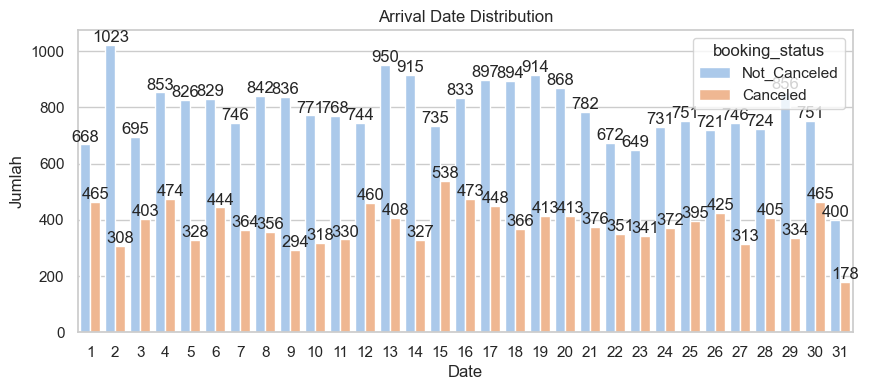

In [20]:
plt.figure(figsize= (10,4), dpi=100)
a = sns.countplot(df.arrival_date, hue=df.booking_status)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("Arrival Date Distribution")
plt.xlabel("Date")
plt.ylabel("Jumlah")
plt.show()

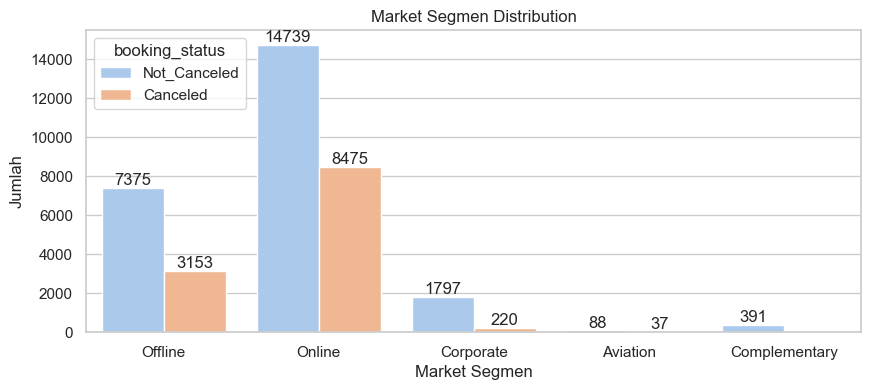

In [21]:
plt.figure(figsize= (10,4), dpi=100)
a = sns.countplot(df.market_segment_type, hue=df.booking_status)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("Market Segmen Distribution")
plt.xlabel("Market Segmen")
plt.ylabel("Jumlah")
plt.show()

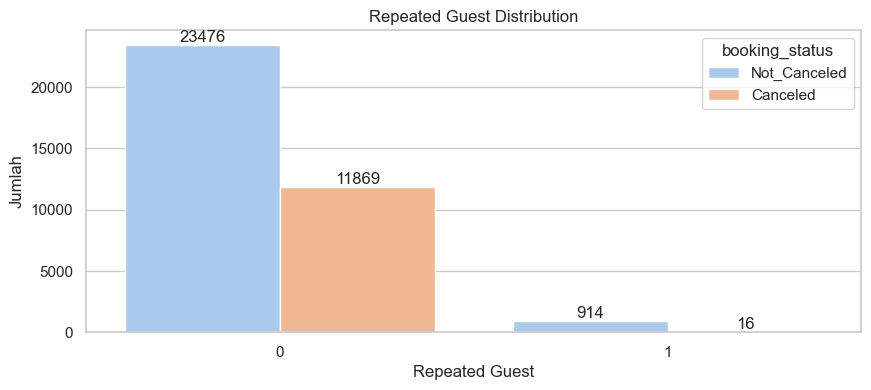

In [22]:
plt.figure(figsize= (10,4), dpi=100)
a = sns.countplot(df.repeated_guest, hue=df.booking_status)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("Repeated Guest Distribution")
plt.xlabel("Repeated Guest")
plt.ylabel("Jumlah")
plt.show()

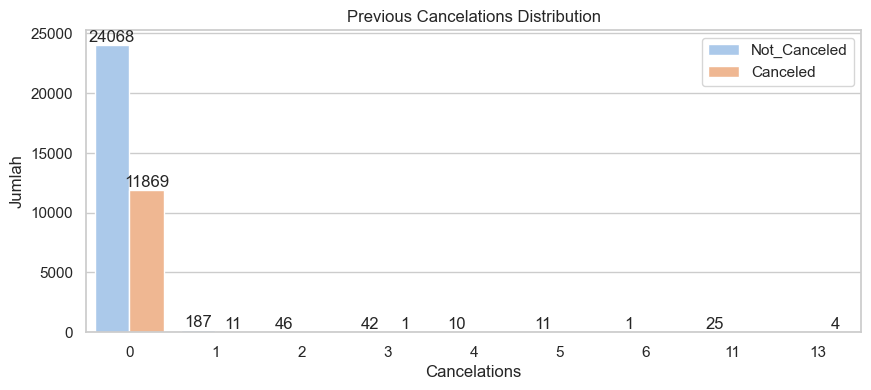

In [23]:
plt.figure(figsize= (10,4), dpi=100)
a = sns.countplot(df.no_of_previous_cancellations, hue=df.booking_status)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("Previous Cancelations Distribution")
plt.xlabel("Cancelations")
plt.ylabel("Jumlah")
plt.legend(loc='upper right')
plt.show()

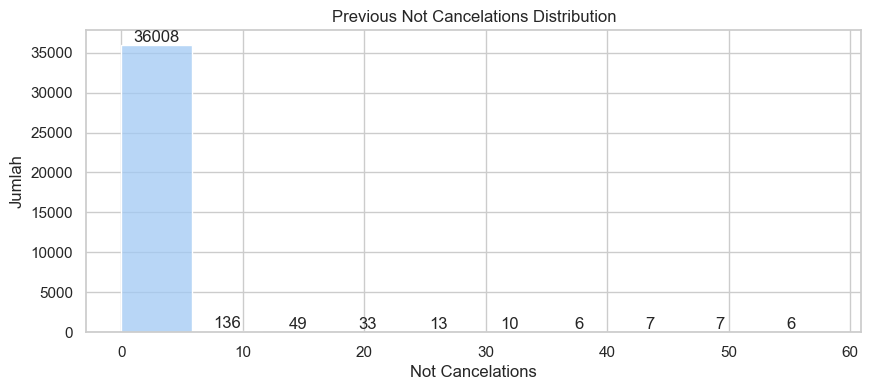

In [24]:
plt.figure(figsize= (10,4), dpi=100)
a = sns.histplot(df.no_of_previous_bookings_not_canceled, bins=10)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("Previous Not Cancelations Distribution")
plt.xlabel("Not Cancelations")
plt.ylabel("Jumlah")
plt.show()

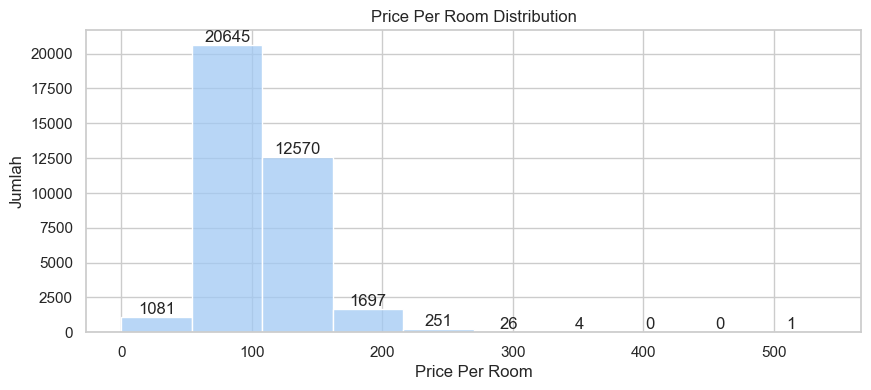

In [25]:
plt.figure(figsize= (10,4), dpi=100)
a = sns.histplot(df.avg_price_per_room, bins=10)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("Price Per Room Distribution")
plt.xlabel("Price Per Room")
plt.ylabel("Jumlah")
plt.show()

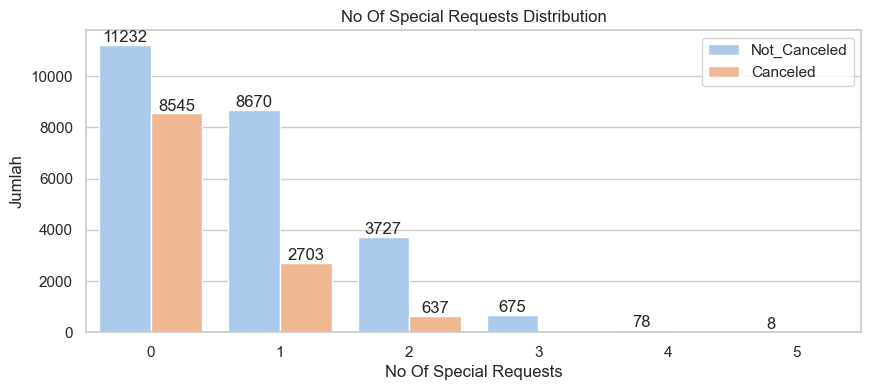

In [26]:
plt.figure(figsize= (10,4), dpi=100)
a = sns.countplot(df.no_of_special_requests, hue=df.booking_status)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("No Of Special Requests Distribution")
plt.xlabel("No Of Special Requests")
plt.ylabel("Jumlah")
plt.legend(loc='upper right')
plt.show()

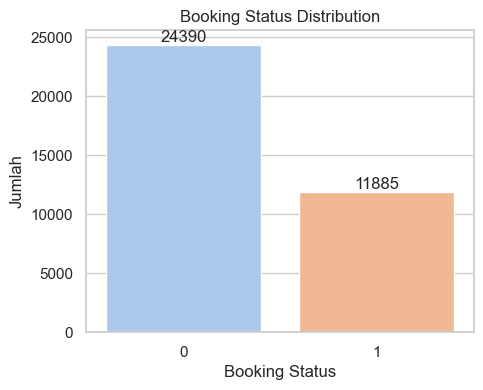

In [174]:
plt.figure(figsize= (5,4), dpi=100)
a = sns.countplot(df.booking_status)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title("Booking Status Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Jumlah")
plt.show()

## Data Preprocessing

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Feature Engineering

In [185]:
#mengubah atribut booking status dengan 0 untuk Not_Canceled dan 1 untuk Canceled
codes = {'Not_Canceled': 0, 'Canceled': 1}
df['booking_status'] = df.booking_status.map(codes)
df.booking_status = df.booking_status.astype('int')

In [186]:
df.booking_status

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int32

In [187]:
df0 = df.copy()

### Corelation

In [32]:
# Cek Korelasi
df_korelasi = df.corr()
df_korelasi = df_korelasi['booking_status'].sort_values(ascending=False)
df_korelasi = pd.DataFrame(df_korelasi)
df_korelasi = df_korelasi.reset_index()
df_korelasi.columns = ['feature', 'target']
df_korelasi.sort_values(by="target", ascending=False)

,feature,target
0,booking_status,1.000000
1,lead_time,0.438538
2,arrival_year,0.179529
3,avg_price_per_room,0.142569
4,no_of_week_nights,0.092996
5,no_of_adults,0.086920
6,no_of_weekend_nights,0.061563
7,no_of_children,0.033078
8,arrival_date,0.010629
9,arrival_month,-0.011233


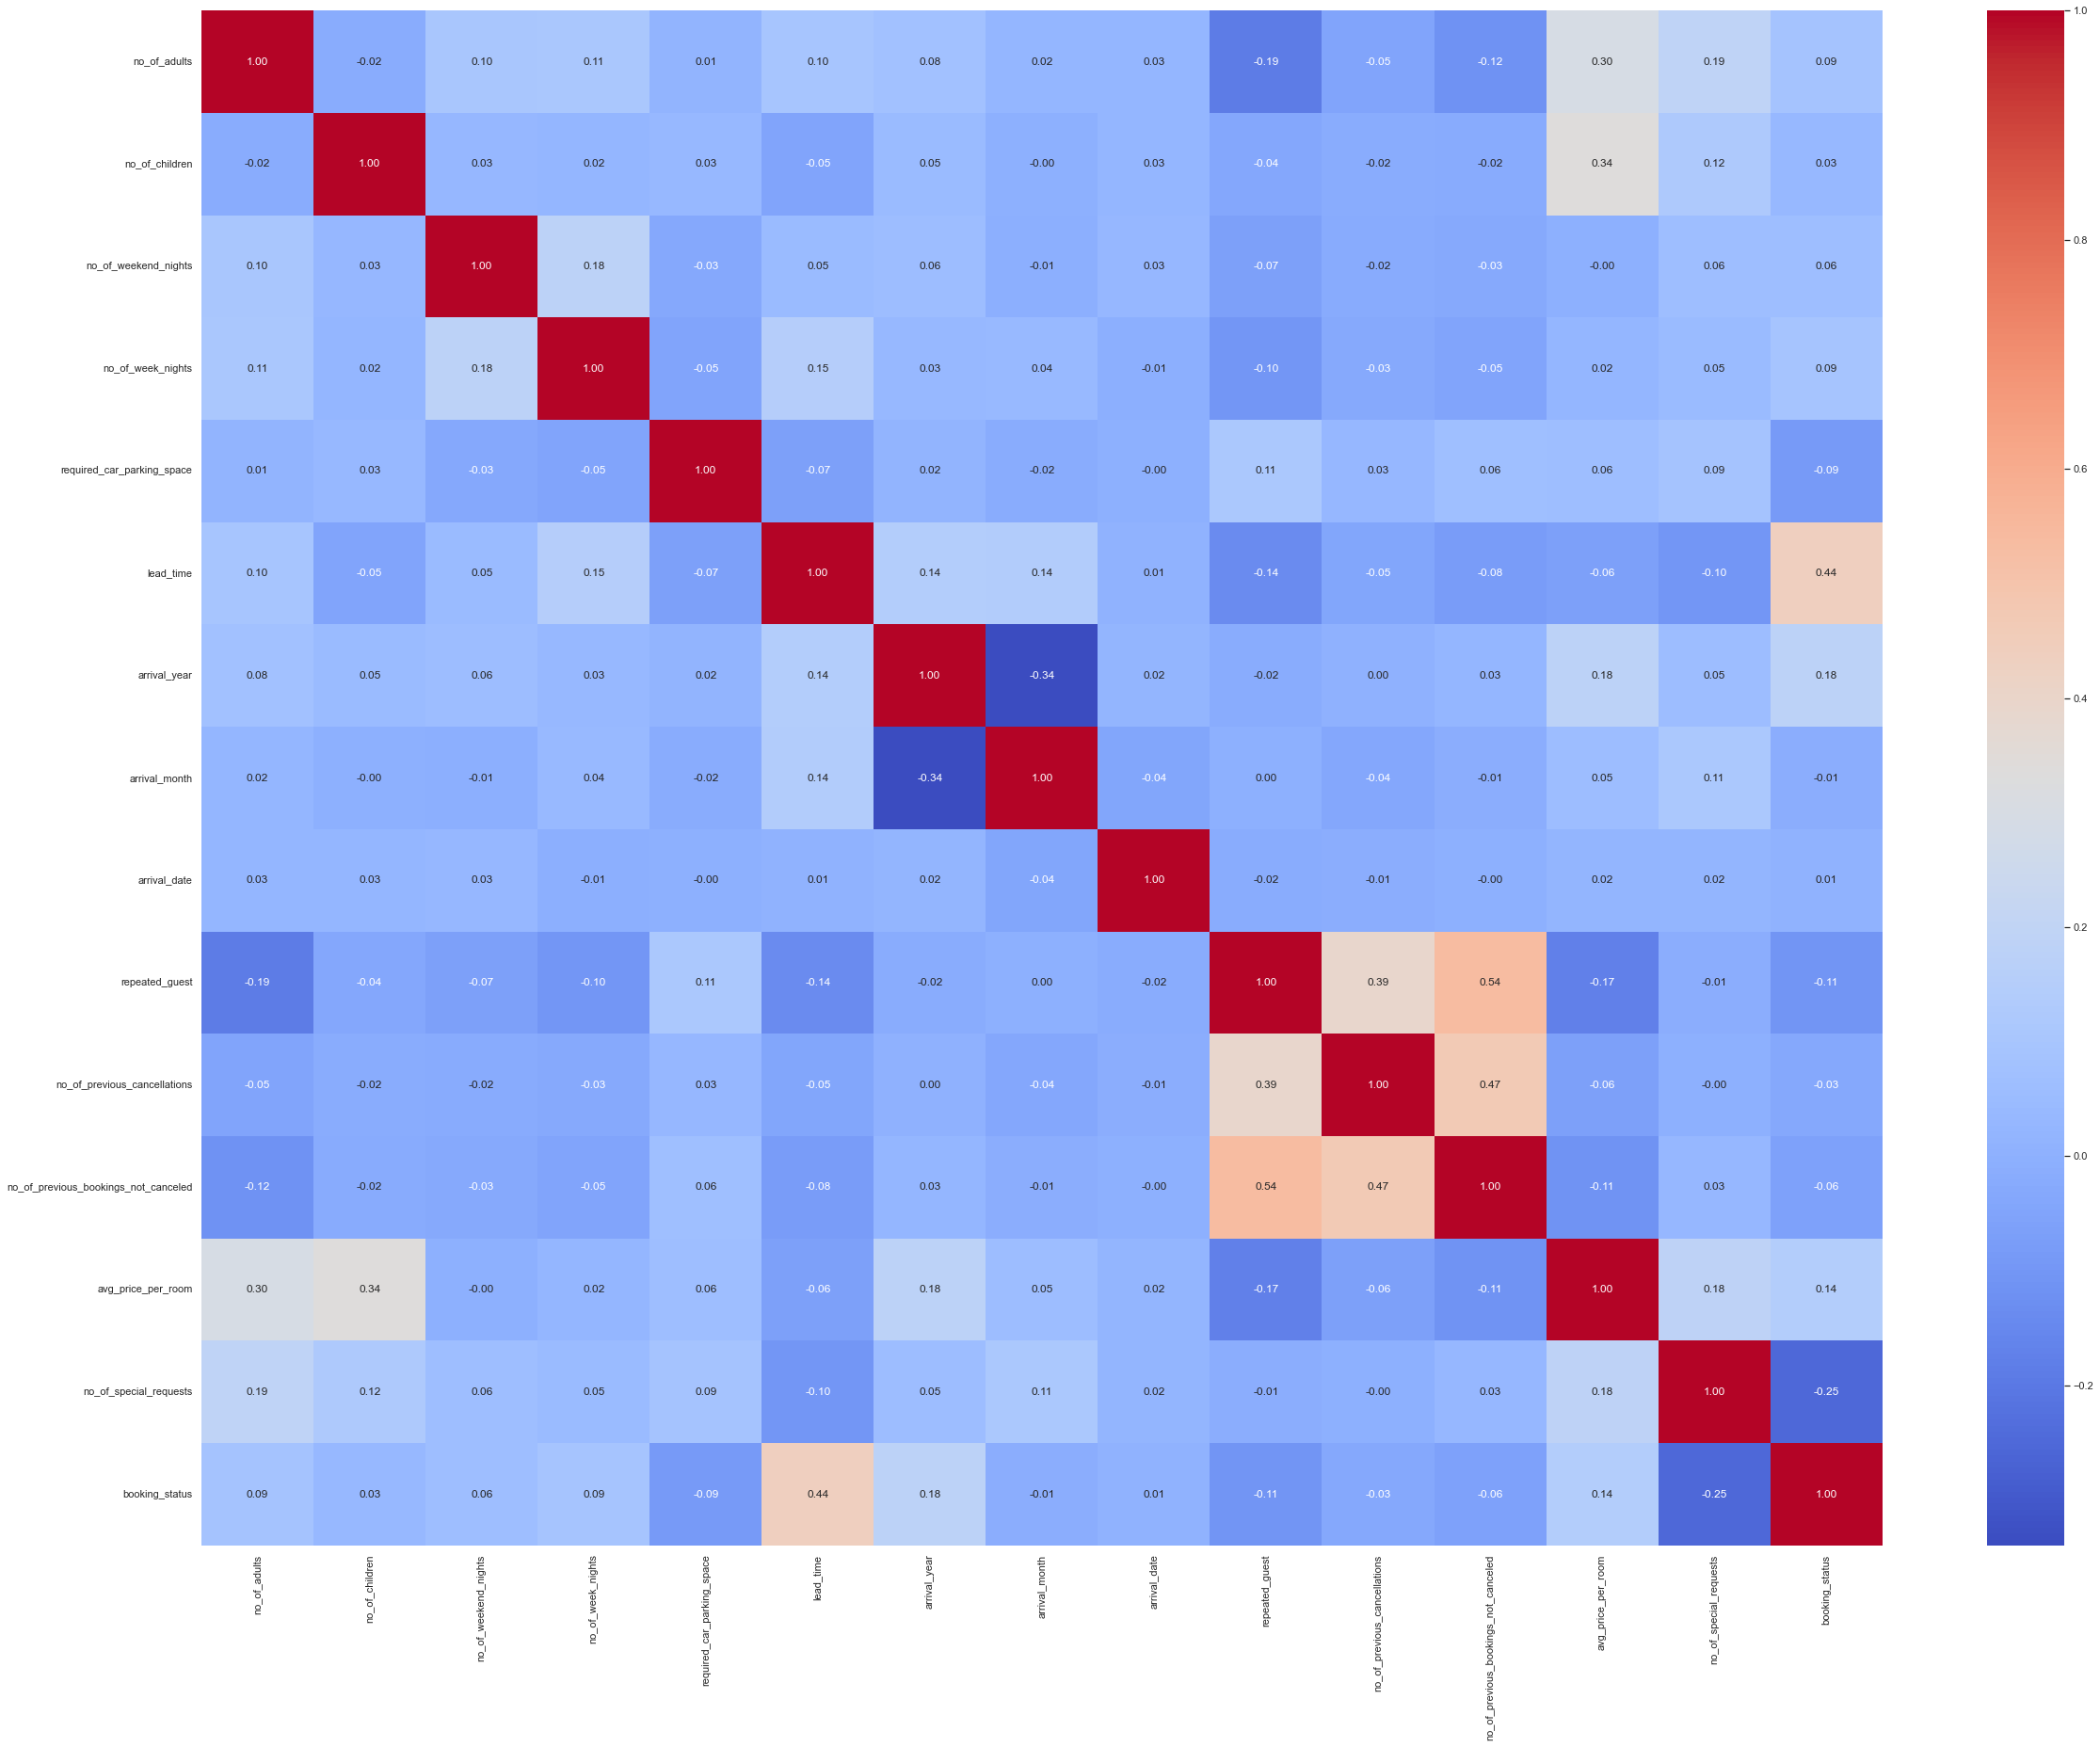

In [33]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [188]:
df = df.drop(columns=['arrival_date', "arrival_month"])

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  market_segment_type                   36275 non-null  object 
 11  repeated_guest 

### Handling Outlier

In [36]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,0.025637,0.023349,0.153411,103.423539,0.619655,0.327636
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


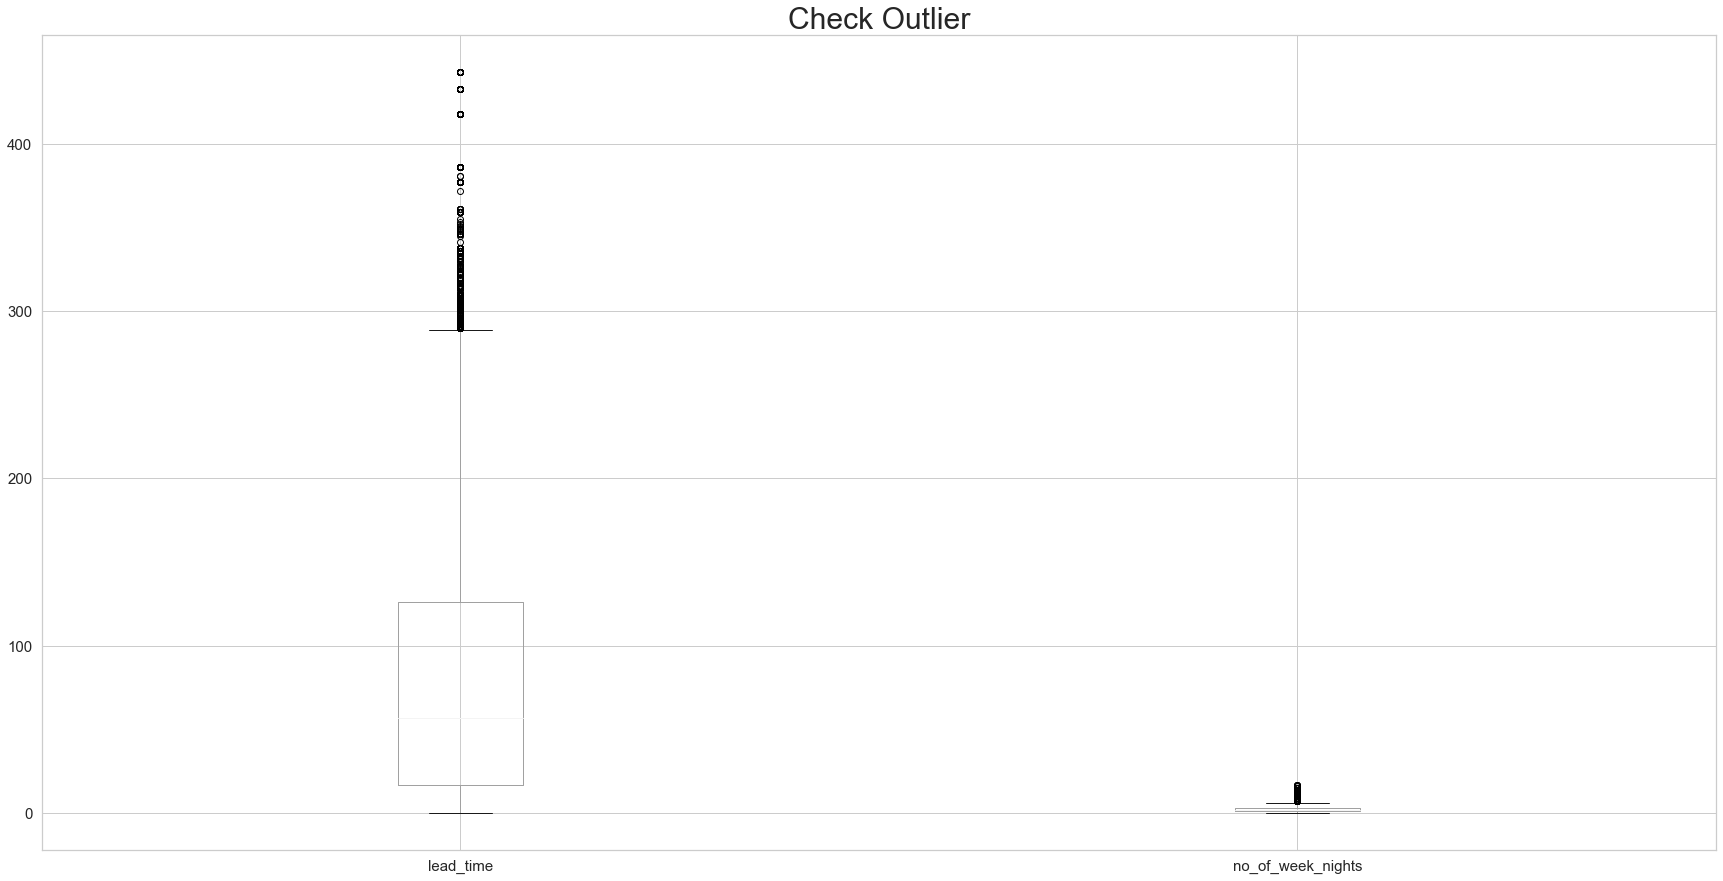

In [190]:
cols = ['lead_time', 'no_of_week_nights']
df[cols].boxplot(figsize=(30,15), fontsize=15)
plt.title("Check Outlier", fontsize=30)
plt.show()

In [191]:
# Cek Outlier dengan IQR
def outlier_iqr(data):
    outliers = []
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    return batas_bawah, batas_atas
    for i in data:
        if i < batas_bawah or i > batas_atas:
            outliers.append(i)
    return outliers
data_outlier = {}
for col in cols:
    data_outlier[col] = outlier_iqr(df[col])
    print('Outlier (',col,') : ',len(data_outlier[col]),' outlier',data_outlier[col])

Outlier ( lead_time ) :  2  outlier (-146.5, 289.5)
Outlier ( no_of_week_nights ) :  2  outlier (-2.0, 6.0)


In [192]:
# Handling Outlier (lead_time)
q1 = df['lead_time'].quantile(0.25)
q3 = df['lead_time'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['lead_time'] = np.where(df['lead_time'] > batas_atas, batas_atas, df['lead_time'])
df['lead_time'] = np.where(df['lead_time'] < batas_bawah, batas_bawah, df['lead_time'])

batas_bawah :  -146.5
batas_atas :  289.5


In [193]:
# Handling Outlier (lead_time)
q1 = df['no_of_week_nights'].quantile(0.25)
q3 = df['no_of_week_nights'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['no_of_week_nights'] = np.where(df['no_of_week_nights'] > batas_atas, batas_atas, df['no_of_week_nights'])
df['no_of_week_nights'] = np.where(df['no_of_week_nights'] < batas_bawah, batas_bawah, df['no_of_week_nights'])

batas_bawah :  -2.0
batas_atas :  6.0


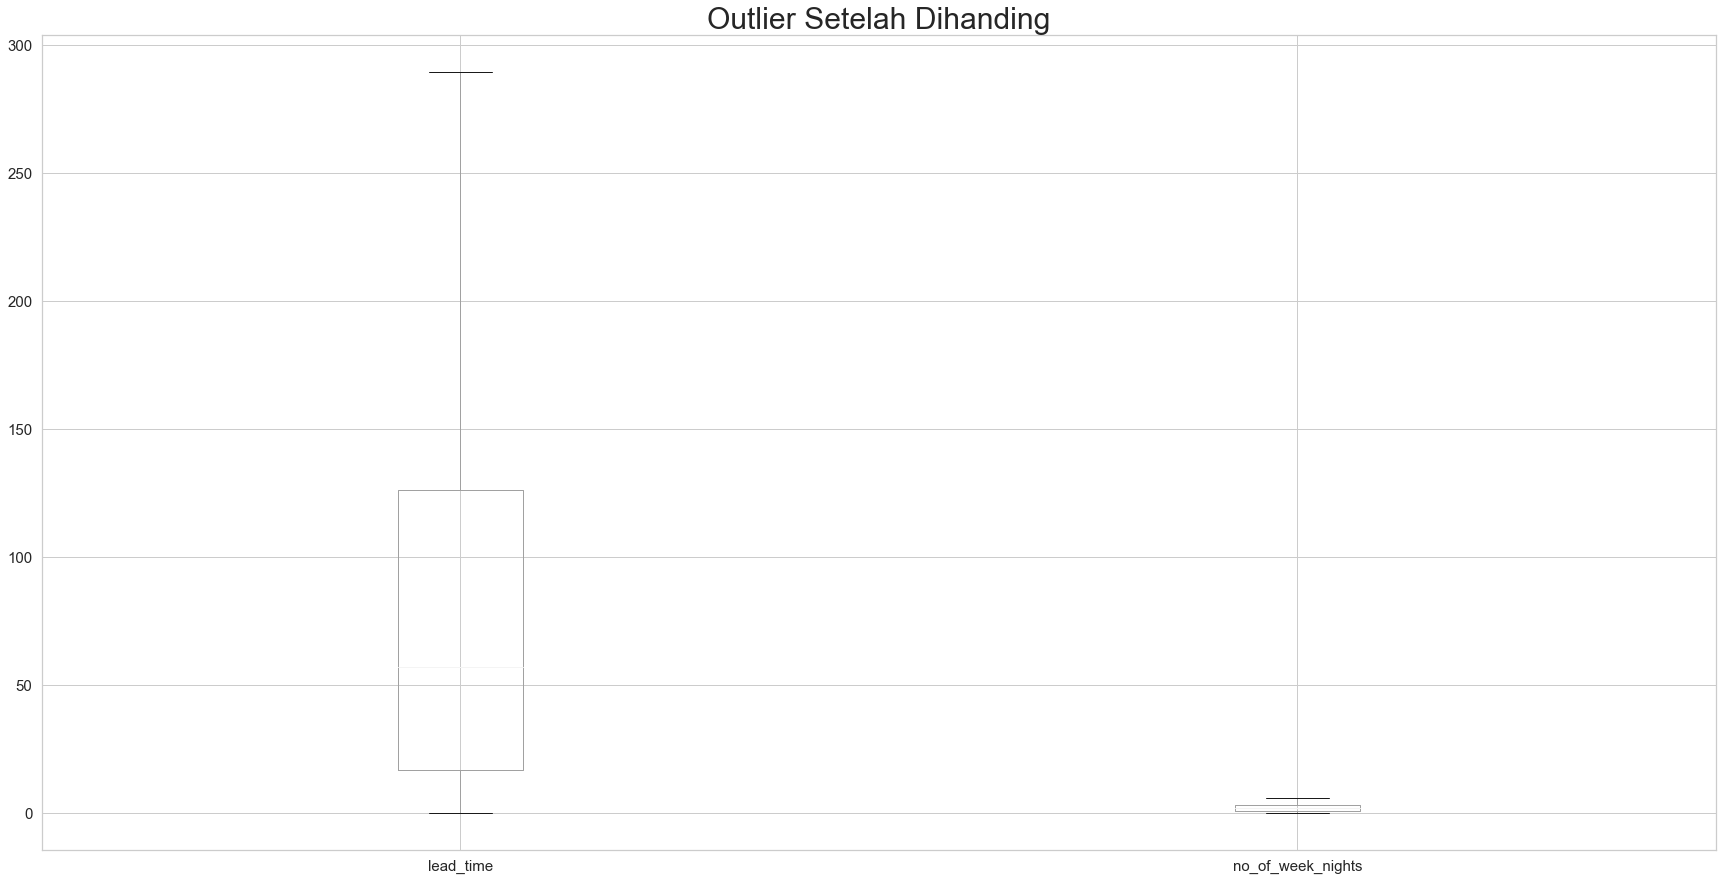

In [195]:
cols = ['lead_time', 'no_of_week_nights']
df[cols].boxplot(figsize=(30,15), fontsize=15)
plt.title("Outlier Setelah Dihanding", fontsize=30)
plt.show()

### Define X,y

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  float64
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  float64
 9   arrival_year                          36275 non-null  int64  
 10  market_segment_type                   36275 non-null  object 
 11  repeated_guest 

In [197]:
input_cols = list(df.columns)[1:-1]
target_col = 'booking_status'

In [198]:
input_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [199]:
target_col

'booking_status'

In [200]:
# define numeric and categorical columns
numeric_cols = df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = df[input_cols].select_dtypes(include='object').columns.tolist()

In [201]:
numeric_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [202]:
categorical_cols

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

### Feature Scaling

In [203]:
from sklearn.preprocessing import MinMaxScaler

In [204]:
scaler = MinMaxScaler()

In [205]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [206]:
df[numeric_cols] = scaler.transform(df[numeric_cols])

In [207]:
df[numeric_cols].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,0.461241,0.010528,0.115818,0.362973,0.030986,0.289332,0.820427,0.025637,0.001796,0.002645,0.191525,0.123931
std,0.129679,0.040265,0.124378,0.215104,0.173281,0.282062,0.383836,0.158053,0.028333,0.030244,0.064980,0.157247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,0.166667,0.000000,0.058722,1.000000,0.000000,0.000000,0.000000,0.148704,0.000000
50%,0.500000,0.000000,0.142857,0.333333,0.000000,0.196891,1.000000,0.000000,0.000000,0.000000,0.184167,0.000000
75%,0.500000,0.000000,0.285714,0.500000,0.000000,0.435233,1.000000,0.000000,0.000000,0.000000,0.222222,0.200000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### One Hot Encoding

In [208]:
from sklearn.preprocessing import OneHotEncoder

In [209]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [210]:
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [211]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [212]:
df[encoded_cols] = encoder.transform(df[categorical_cols])

In [213]:
encoder.categories_

[array(['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected'],
       dtype=object),
 array(['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4',
        'Room_Type 5', 'Room_Type 6', 'Room_Type 7'], dtype=object),
 array(['Aviation', 'Complementary', 'Corporate', 'Offline', 'Online'],
       dtype=object)]

### Handling Imbalance

In [214]:
X = df[numeric_cols + encoded_cols]
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.50,0.0,0.142857,0.333333,0.0,0.773748,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.50,0.0,0.285714,0.500000,0.0,0.017271,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.25,0.0,0.285714,0.166667,0.0,0.003454,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.50,0.0,0.000000,0.333333,0.0,0.728843,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.50,0.0,0.142857,0.166667,0.0,0.165803,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,0.75,0.0,0.285714,1.000000,0.0,0.293610,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36271,0.50,0.0,0.142857,0.500000,0.0,0.787565,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36272,0.50,0.0,0.285714,1.000000,0.0,0.511226,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36273,0.50,0.0,0.000000,0.500000,0.0,0.217617,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [215]:
y = df[target_col]
y

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int32

In [216]:
y.value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

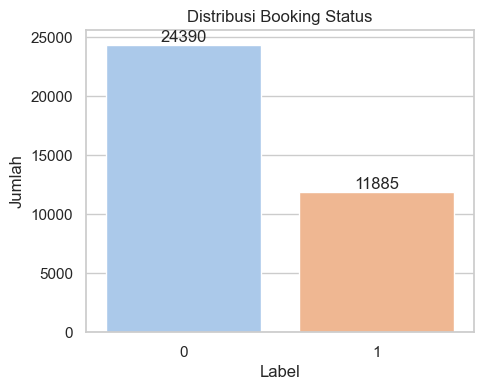

In [217]:
plt.figure(figsize=(5,4), dpi=100)
a = sns.countplot(y)
for j in a.containers:
    a.bar_label(j, label_type="edge")
plt.title("Distribusi Booking Status")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

In [218]:
# Cek Imbalance Data
#Over Sampling (SMOTE)
from imblearn.over_sampling import SMOTE
from collections import Counter

X, y = SMOTE().fit_resample(X, y)
print(sorted(Counter(y).items()))

[(0, 24390), (1, 24390)]


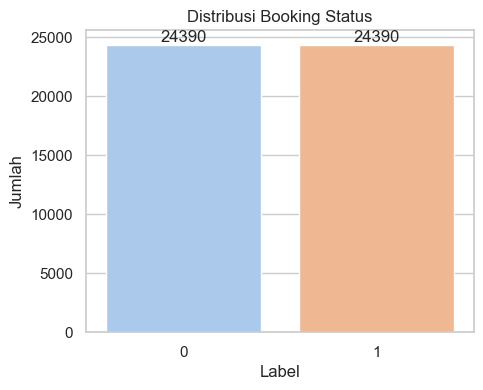

In [220]:
plt.figure(figsize=(5,4), dpi=100)
a = sns.countplot(y)
for j in a.containers:
    a.bar_label(j, label_type="edge")
plt.title("Distribusi Booking Status")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

## Modeling

In [66]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.50,0.0,0.142857,0.333333,0.0,0.773748,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.50,0.0,0.285714,0.500000,0.0,0.017271,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.25,0.0,0.285714,0.166667,0.0,0.003454,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.50,0.0,0.000000,0.333333,0.0,0.728843,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.50,0.0,0.142857,0.166667,0.0,0.165803,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [69]:
X_train.shape, y_train.shape

((36585, 28), (36585,))

In [70]:
X_test.shape, y_test.shape

((12195, 28), (12195,))

### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model_lr = LogisticRegression(random_state=42)

In [73]:
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [74]:
lr_mod = model_lr.predict(X_test)

In [75]:
lr_mod

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
accuracy_score(lr_mod, y_test)

0.7792537925379254

In [77]:
def predict_and_plot(inputs, targets, name=''):
    preds = model_lr.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy : {:.2f}%".format(accuracy * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, preds) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, preds) * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy : 77.94%
Precison : 78.39%
Recall   : 77.16%


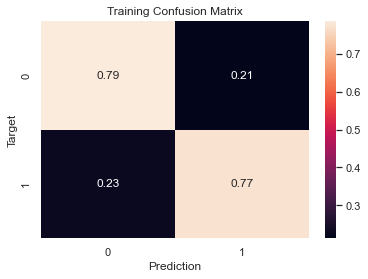

In [78]:
train_preds = predict_and_plot(X_train, y_train, 'Training')

Accuracy : 77.93%
Precison : 78.73%
Recall   : 76.43%


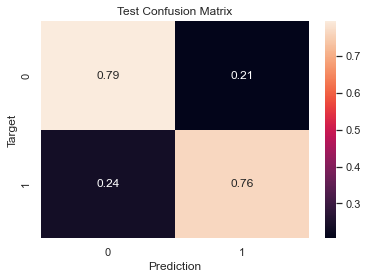

In [79]:
test_preds = predict_and_plot(X_test, y_test, 'Test')

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      6107
           1       0.79      0.76      0.78      6088

    accuracy                           0.78     12195
   macro avg       0.78      0.78      0.78     12195
weighted avg       0.78      0.78      0.78     12195



In [81]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE Logistic Regresi',mean_absolute_error(y_test, test_preds))

MAE Logistic Regresi 0.22074620746207463


In [82]:
# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve, auc
print('ROC AUC Logistic Regression',roc_auc_score(y_test, lr_mod))

ROC AUC Logistic Regression 0.7792305156164907


In [83]:
def roc_curve_func(y_test, y_pred, nama=''):
  # Compute fpr, tpr, thresholds and roc auc
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)

  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  #plt.title('Receiver Operating Characteristic')
  plt.title('ROC Curve {}'.format(nama))
  plt.legend(loc="lower right")

In [84]:
y_train_pred_proba=model_lr.predict_proba(X_train)[:,1]

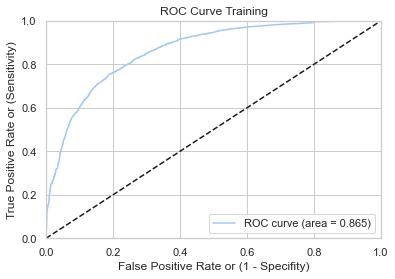

In [85]:
roc_curve_func(y_train,y_train_pred_proba,'Training')

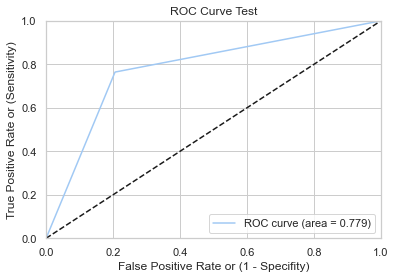

In [86]:
roc_curve_func(y_test,test_preds,'Test')

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.72')

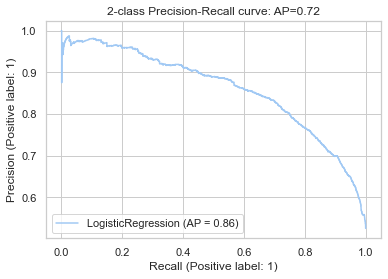

In [87]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_lr, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                     'AP={0:0.2f}'.format(average_precision_score(y_test, test_preds)))

### Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
model_dt = DecisionTreeClassifier(random_state=42)

In [90]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [91]:
dt_mod = model_dt.predict(X_test)
dt_mod

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
def dt_model(inputs, targets, name=""):
    pred_dt = model_dt.predict(inputs)
    accuracy_dt = accuracy_score(targets, pred_dt)
    print("Accuracy : {:.2f}%".format(accuracy_dt * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_dt) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_dt) * 100))
    
    cm = confusion_matrix(targets, pred_dt, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlGn')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_dt

Accuracy : 99.30%
Precison : 99.50%
Recall   : 99.10%


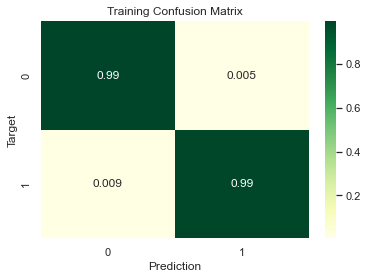

In [93]:
# Train Decision Tree
train_dt = dt_model(X_train, y_train, 'Training')

Accuracy : 86.88%
Precison : 87.07%
Recall   : 86.58%


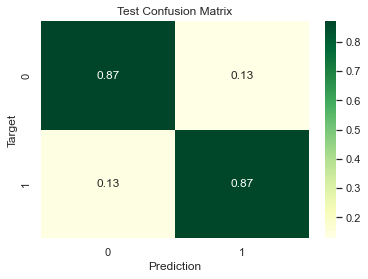

In [94]:
# Prediksi Decision Tree
dt_pred = dt_model(X_test, y_test, 'Test')

In [95]:
# Classification Report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6107
           1       0.87      0.87      0.87      6088

    accuracy                           0.87     12195
   macro avg       0.87      0.87      0.87     12195
weighted avg       0.87      0.87      0.87     12195



In [96]:
# MAE
print('MAE Decision Tree',mean_absolute_error(y_test, dt_pred))

MAE Decision Tree 0.13120131201312013


In [97]:
def roc_curve_dt(y_test, y_pred, nama=''):
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    #plt.title('Receiver Operating Characteristic')
    plt.title('ROC Curve {}'.format(nama))
    plt.legend(loc="lower right")

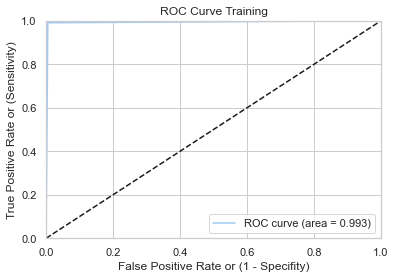

In [98]:
roc_curve_dt(y_train,train_dt,'Training')

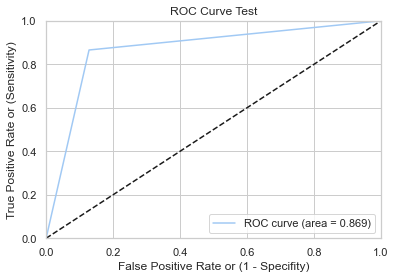

In [99]:
roc_curve_dt(y_test, dt_pred,'Test')

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.82')

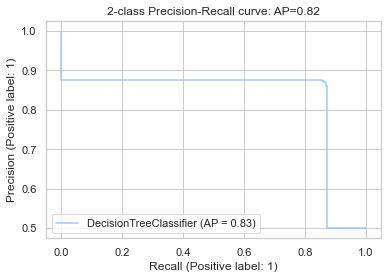

In [100]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_dt, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, dt_pred)))

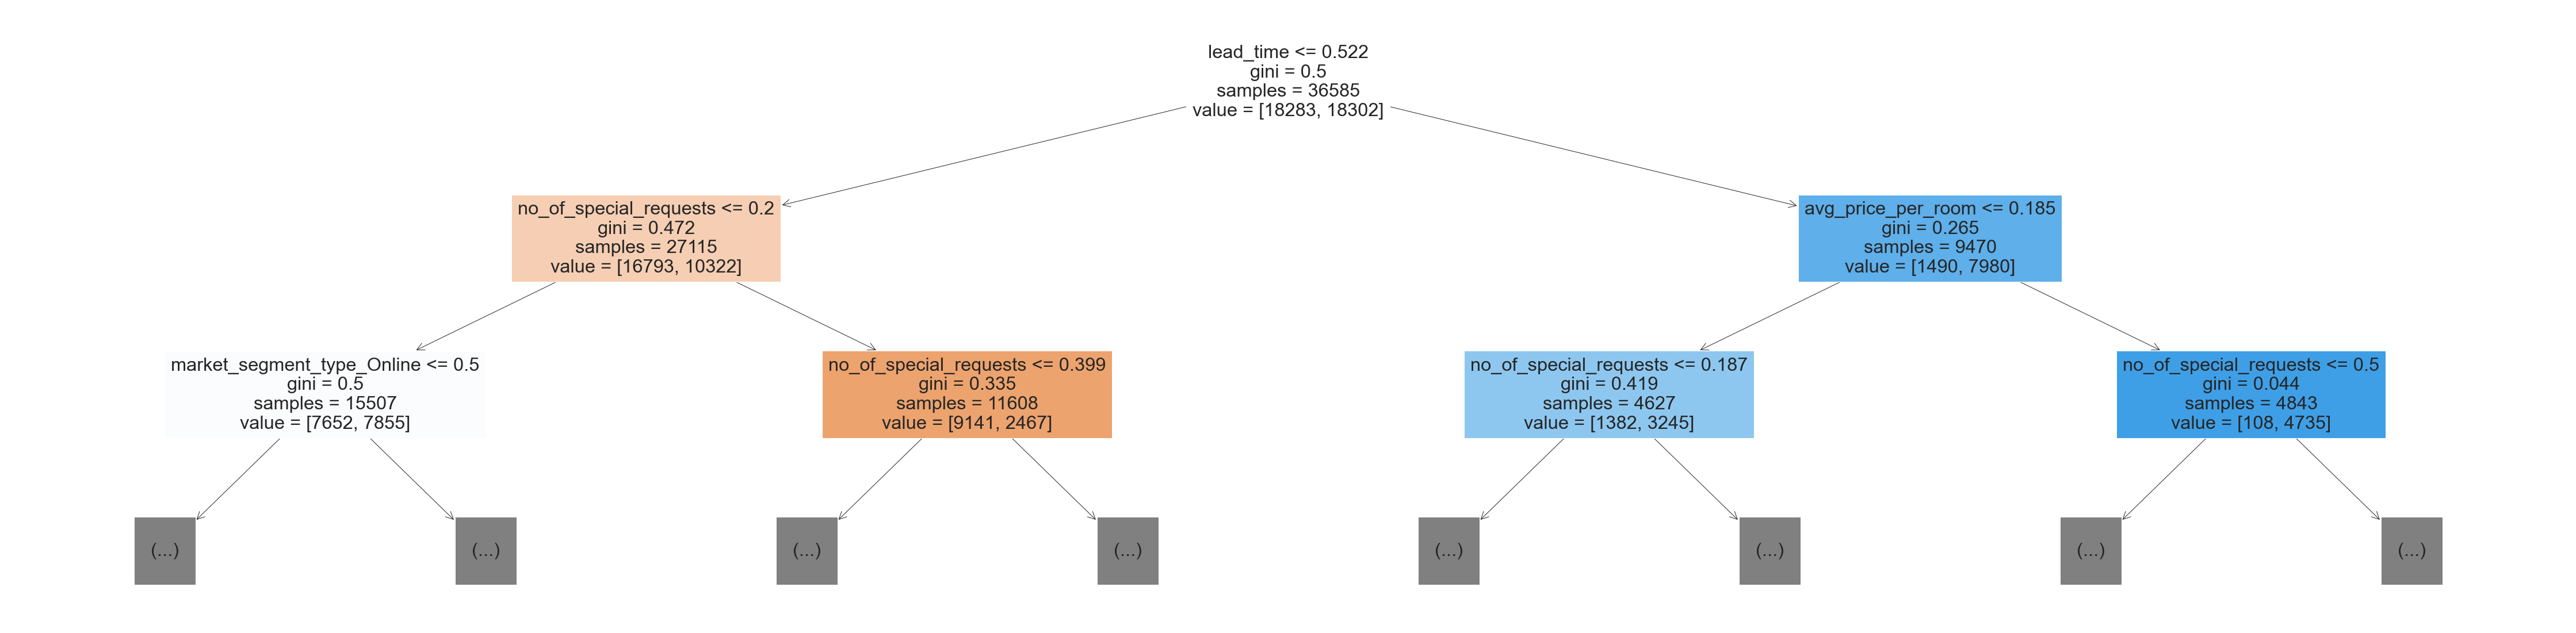

In [101]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model_dt, feature_names=X_train.columns, max_depth=2, filled=True);

### Random Forest

In [102]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state = 42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [103]:
# Prediksi Random Forest
rf_mod = model_rf.predict(X_test)
rf_mod

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
def rf_model(inputs, targets, name=''):
    pred_rf = model_rf.predict(inputs)
    accuracy_rf = accuracy_score(targets,pred_rf)
    print("Accuracy : {:.2f}%".format(accuracy_rf * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_rf) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_rf) * 100))

    cm = confusion_matrix(targets, pred_rf, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlGn')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_rf

Accuracy : 99.30%
Precison : 99.35%
Recall   : 99.25%


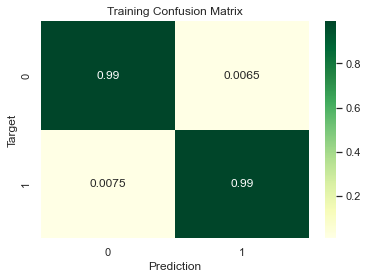

In [105]:
# Training
train_rf = rf_model(X_train, y_train, 'Training')

Accuracy : 90.18%
Precison : 91.19%
Recall   : 88.93%


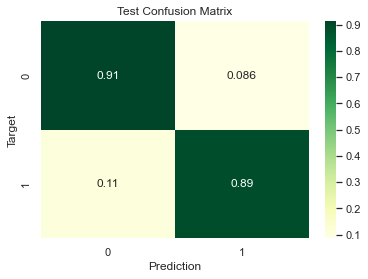

In [106]:
# Prediksi Random Forest
pred_rf = rf_model(X_test, y_test, 'Test')

In [107]:
# Classification Report
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6107
           1       0.91      0.89      0.90      6088

    accuracy                           0.90     12195
   macro avg       0.90      0.90      0.90     12195
weighted avg       0.90      0.90      0.90     12195



In [108]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE Random Forest',mean_absolute_error(y_test, pred_rf))

MAE Random Forest 0.0981549815498155


In [109]:
def roc_curve_rf(y_test, y_pred, nama=''):
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    #plt.title('Receiver Operating Characteristic')
    plt.title('ROC Curve {}'.format(nama))
    plt.legend(loc="lower right")

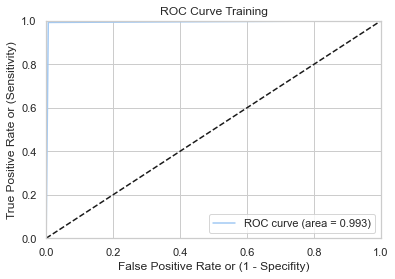

In [110]:
roc_curve_rf(y_train,train_rf,'Training')

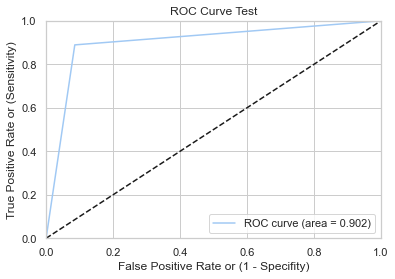

In [111]:
roc_curve_rf(y_test,pred_rf,'Test')

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.87')

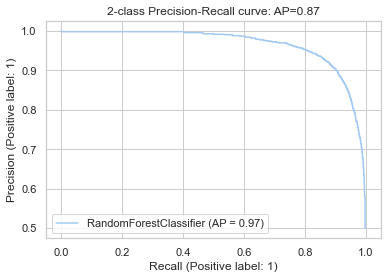

In [112]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_rf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, pred_rf)))

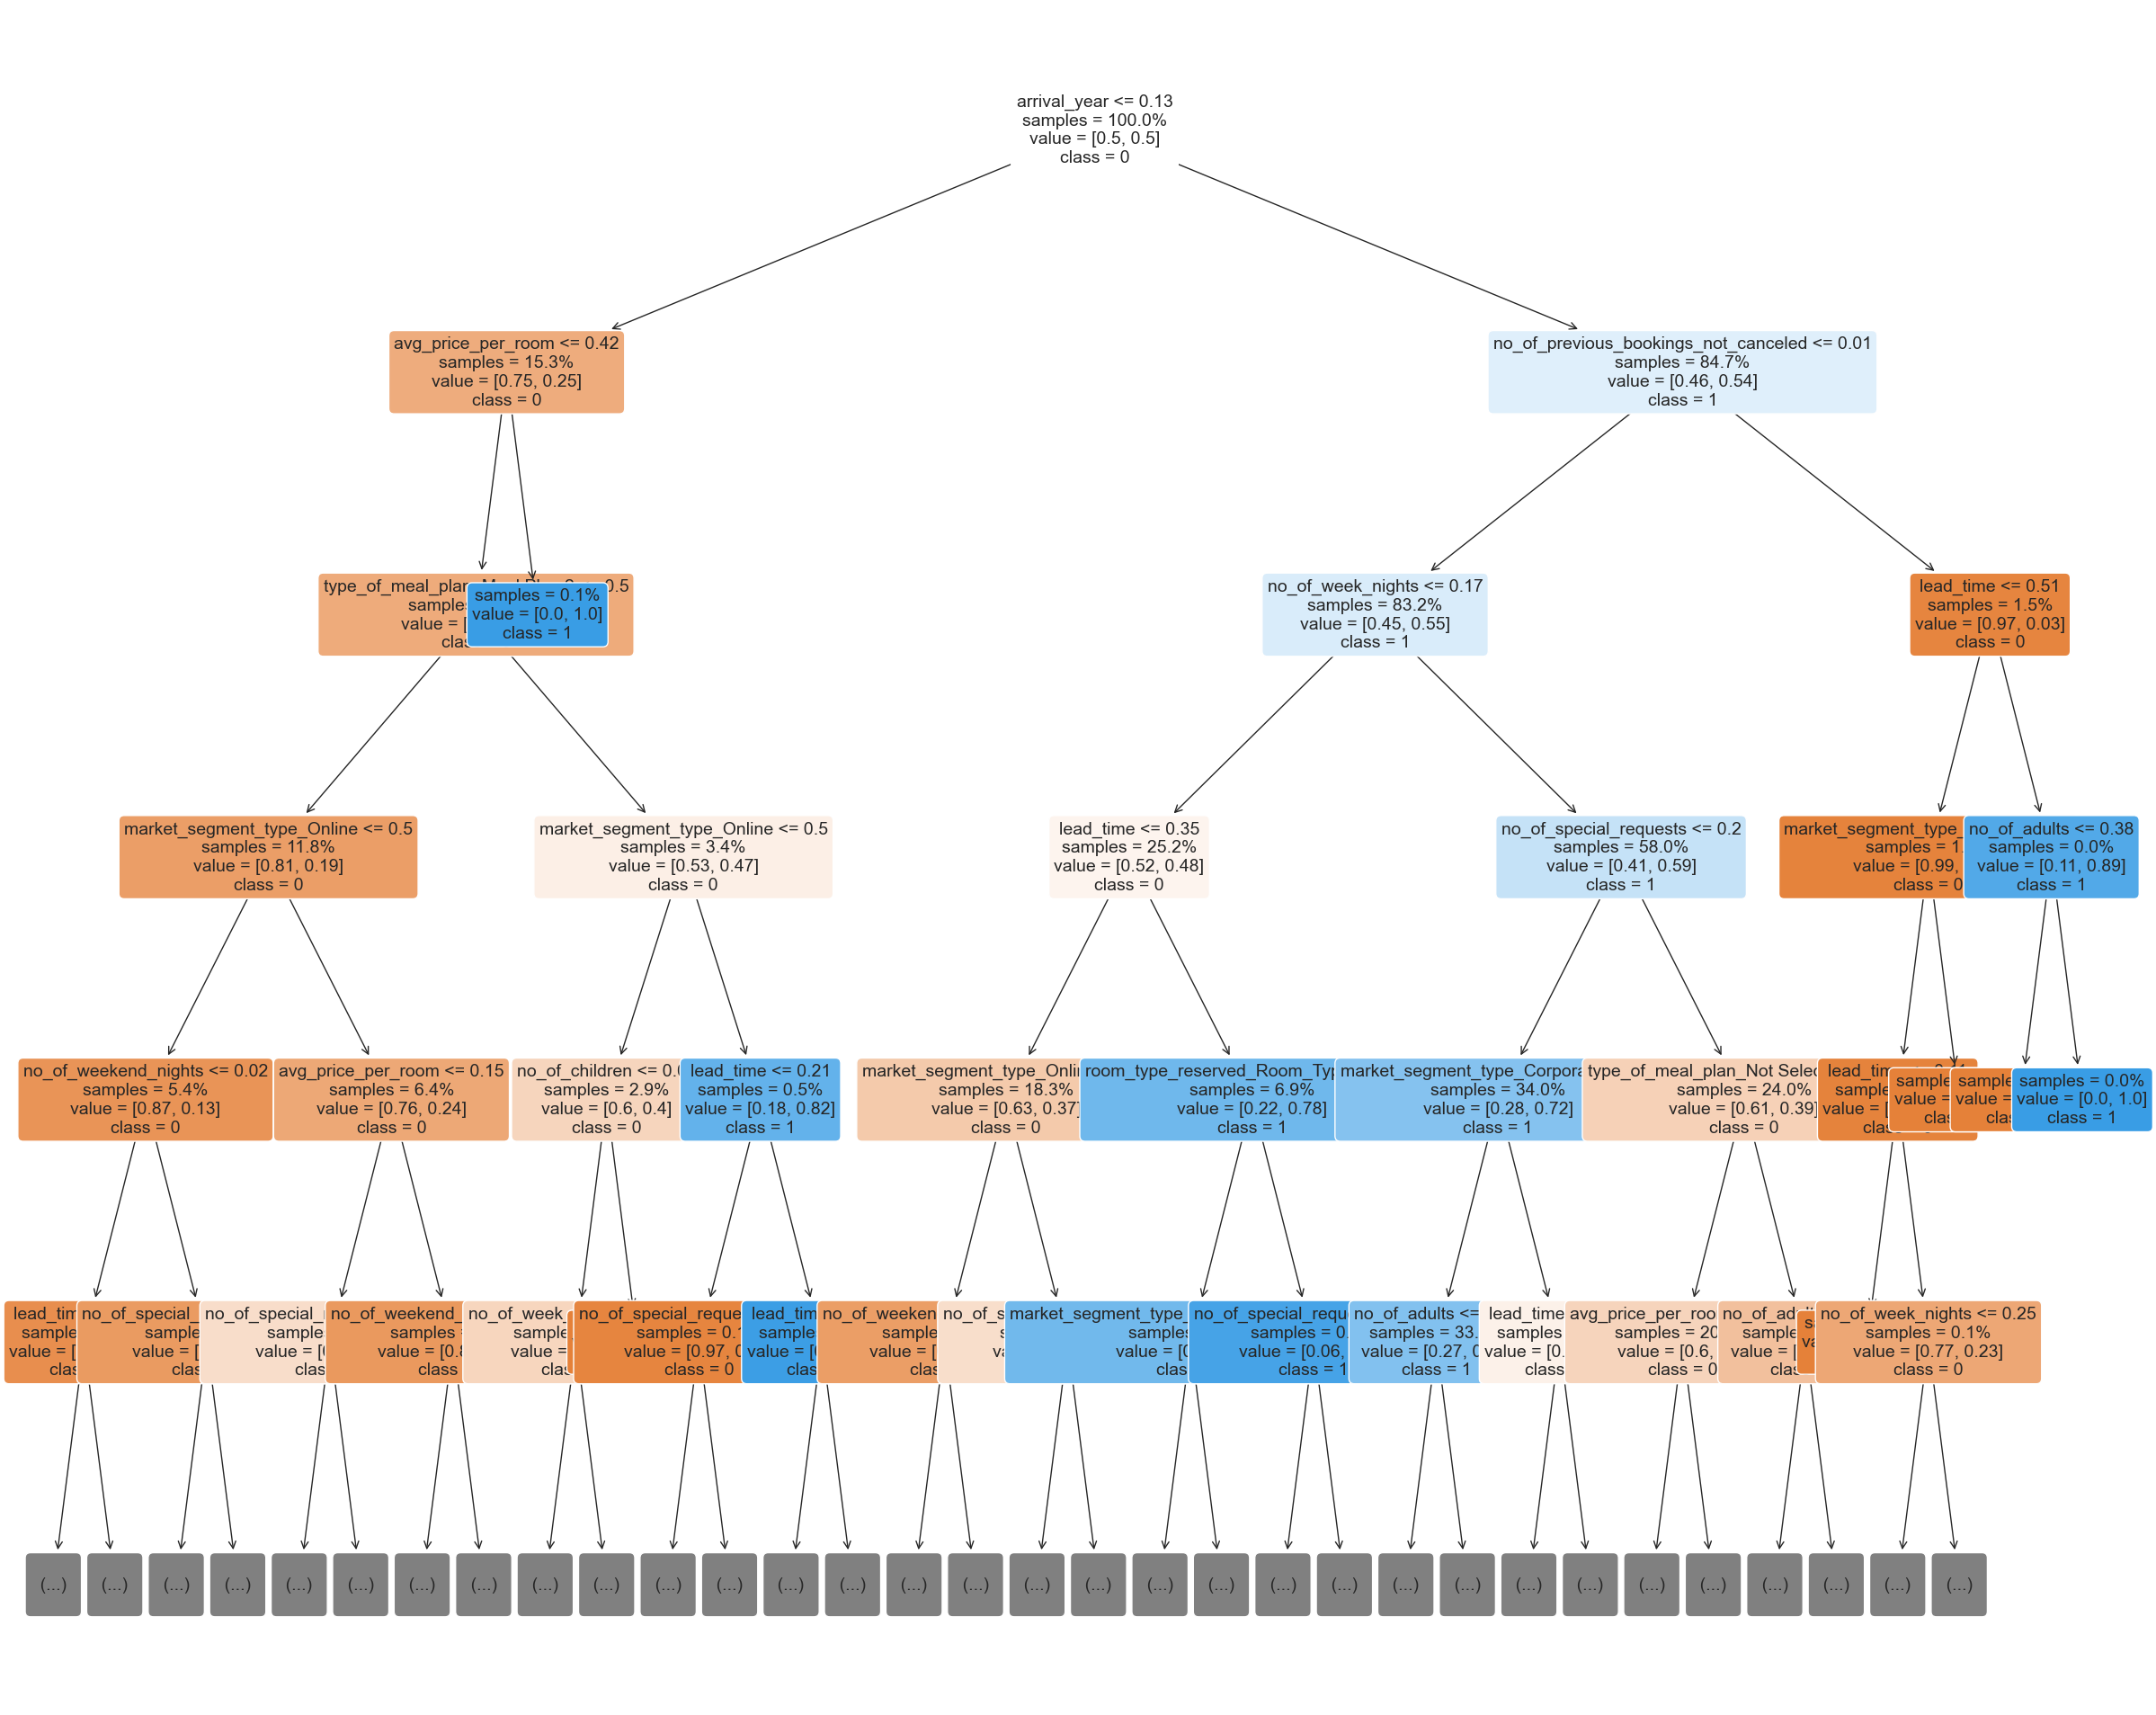

In [113]:
# Graph Model
from sklearn import tree
plt.figure(figsize=(30,25), dpi=100)
tree.plot_tree(model_rf.estimators_[0], filled=True, rounded=True, class_names=['0', '1'], feature_names=X.columns, fontsize=14, max_depth=5, impurity=False, proportion=True, precision=2, label='all')
#tree.plot_tree(model_rf.estimators_[1], filled=True, rounded=True, class_names=['0', '1'], feature_names=X.columns, fontsize=14, max_depth=5, impurity=False)
plt.show()

### Naive Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB

In [116]:
model_nb = GaussianNB()

In [117]:
model_nb.fit(X_train, y_train)

GaussianNB()

In [118]:
nb_mod = model_nb.predict(X_test)
nb_mod

array([1, 1, 1, ..., 0, 1, 1])

In [119]:
def nb_model(inputs, targets, name=''):
    pred_nb = model_nb.predict(inputs)
    accuracy_nb = accuracy_score(targets,pred_nb)
    print("Accuracy : {:.2f}%".format(accuracy_nb * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_nb) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_nb) * 100))

    cm = confusion_matrix(targets, pred_nb, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlOrBr')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_nb

Accuracy : 55.21%
Precison : 52.87%
Recall   : 96.54%


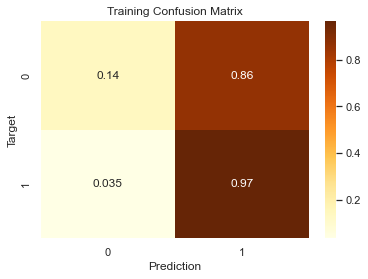

In [120]:
# Train Naive Bayes
train_nb = nb_model(X_train, y_train, 'Training')

Accuracy : 54.43%
Precison : 52.38%
Recall   : 95.96%


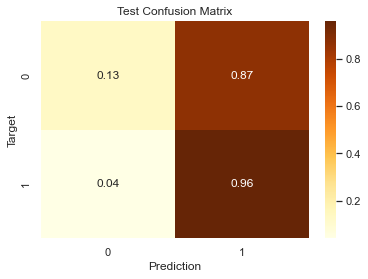

In [121]:
# Prediksi Naive Bayes
nb_pred = nb_model(X_test, y_test, 'Test')

In [122]:
# Classification Report
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.76      0.13      0.22      6107
           1       0.52      0.96      0.68      6088

    accuracy                           0.54     12195
   macro avg       0.64      0.54      0.45     12195
weighted avg       0.64      0.54      0.45     12195



In [123]:
# MAE
print('MAE Naive Bayes',mean_absolute_error(y_test, nb_pred))

MAE Naive Bayes 0.45567855678556785


In [124]:
def roc_curve_nb(y_test, y_pred, nama=''):
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    #plt.title('Receiver Operating Characteristic')
    plt.title('ROC Curve {}'.format(nama))
    plt.legend(loc="lower right")

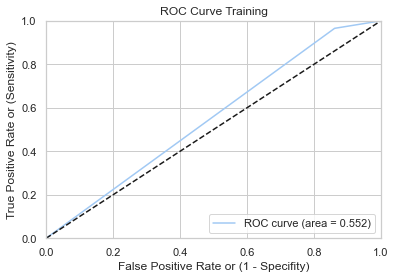

In [125]:
roc_curve_nb(y_train,train_nb,'Training')

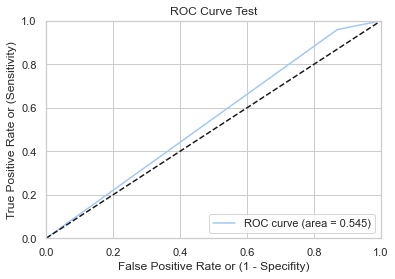

In [126]:
roc_curve_nb(y_test, nb_pred,'Test')

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.52')

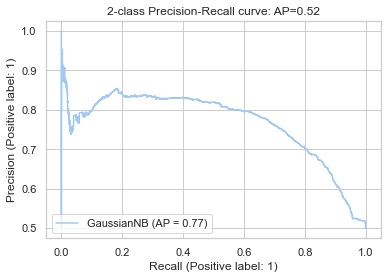

In [127]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_nb, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, nb_pred)))

### K-Nearest Neighbors

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
model_knn = KNeighborsClassifier()

In [130]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [131]:
knn_mod = model_knn.predict(X_test)

In [132]:
knn_mod

array([0, 0, 0, ..., 0, 0, 0])

In [135]:
def knn_model(inputs, targets, name='' ):
    pred_knn = model_knn.predict(inputs)
    accuracy_knn = accuracy_score(targets, pred_knn)
    print("Accuracy : {:.2f}%".format(accuracy_knn * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_knn) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_knn) * 100))

    cm = confusion_matrix(targets, pred_knn, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_knn

Accuracy : 90.50%
Precison : 88.79%
Recall   : 92.71%


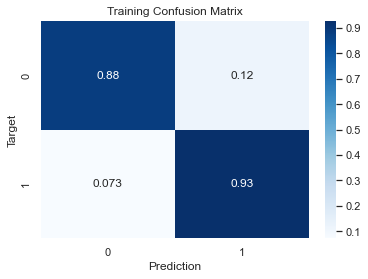

In [136]:
knn_train = knn_model(X_train, y_train, name="Training")

Accuracy : 86.35%
Precison : 84.67%
Recall   : 88.72%


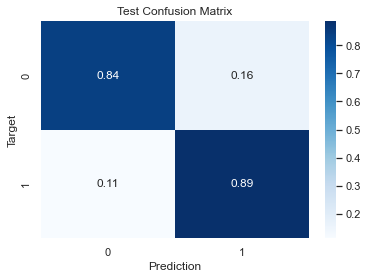

In [137]:
knn_test = knn_model(X_test, y_test, name="Test")

In [140]:
print(classification_report(y_test, knn_mod))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      6107
           1       0.85      0.89      0.87      6088

    accuracy                           0.86     12195
   macro avg       0.86      0.86      0.86     12195
weighted avg       0.86      0.86      0.86     12195



In [141]:
# MAE
print('MAE KNN',mean_absolute_error(y_test, knn_mod))

MAE KNN 0.13653136531365315


In [142]:
def roc_auc_knn(y_test, y_pred, nama=''):
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    #plt.title('Receiver Operating Characteristic')
    plt.title('ROC Curve {}'.format(nama))
    plt.legend(loc="lower right")

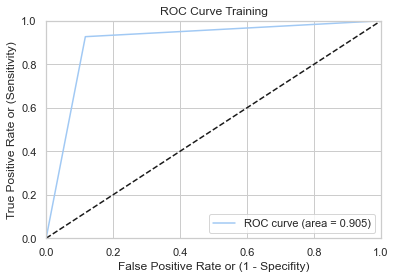

In [143]:
roc_auc_knn(y_train, knn_train, 'Training')

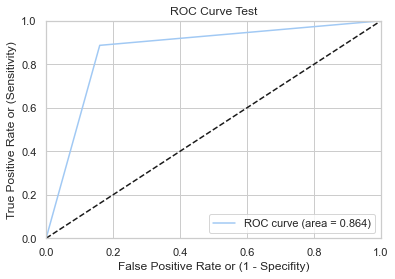

In [145]:
roc_auc_knn(y_test, knn_mod, 'Test')

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.81')

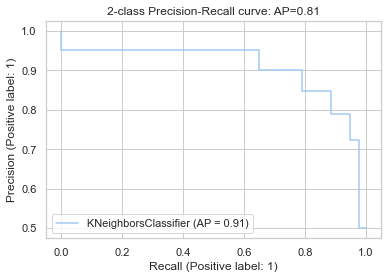

In [148]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_knn, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, knn_mod)))

### Hyperparameter Tuning

Dapat dilihat bahwa model terbaik adalah Random Forest, tetapi masih ada overfitting pada model Random Forest. Untuk mengatasi hal ini akan dilakukan Hyperparameter Tuning menggunakan Random Search

In [153]:
from sklearn.model_selection import RandomizedSearchCV

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [154]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)

In [155]:
rf_random.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 40,
 'bootstrap': False}

In [156]:
best_model_pred = rf_random.predict(X_test)
best_model_pred

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
def best_model(inputs, targets, name='' ):
    pred_best = rf_random.predict(inputs)
    accuracy_best = accuracy_score(targets, pred_best)
    print("Accuracy : {:.2f}%".format(accuracy_best * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_best) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_best) * 100))

    cm = confusion_matrix(targets, pred_best, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_best

Accuracy : 99.16%
Precison : 99.24%
Recall   : 99.07%


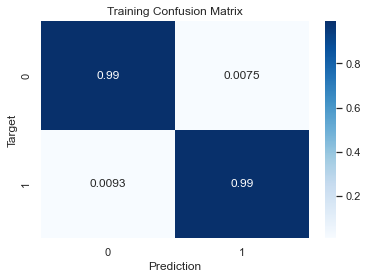

In [158]:
train_best = best_model(X_train, y_train, name='Training')

Accuracy : 90.36%
Precison : 91.17%
Recall   : 89.36%


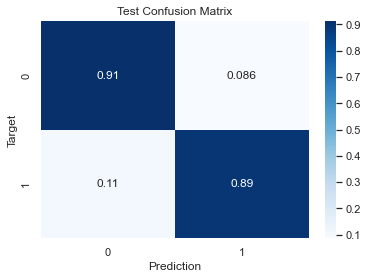

In [159]:
test_best = best_model(X_test, y_test, name="Test")

In [161]:
#Classification Report
print(classification_report(y_test, best_model_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      6107
           1       0.91      0.89      0.90      6088

    accuracy                           0.90     12195
   macro avg       0.90      0.90      0.90     12195
weighted avg       0.90      0.90      0.90     12195



In [162]:
# MAE
print('MAE Hyperparameter Tuning',mean_absolute_error(y_test, best_model_pred))

MAE Hyperparameter Tuning 0.0963509635096351


In [163]:
def roc_curve_best(y_test, y_pred, nama=''):
  # Compute fpr, tpr, thresholds and roc auc
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)

  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  #plt.title('Receiver Operating Characteristic')
  plt.title('ROC Curve {}'.format(nama))
  plt.legend(loc="lower right")

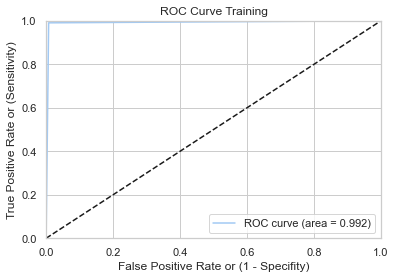

In [164]:
roc_curve_best(y_train, train_best,'Training')

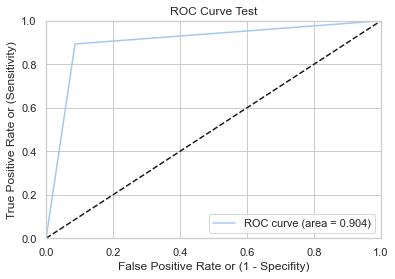

In [165]:
roc_curve_best(y_test, test_best,'Test')

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.87')

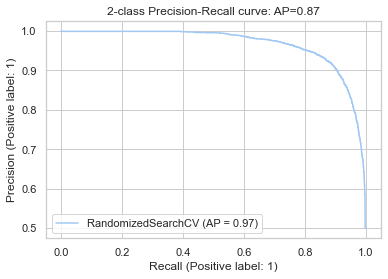

In [167]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(rf_random, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, best_model_pred)))

#### Feature Importances

In [169]:
importances = rf_random.best_estimator_.feature_importances_

In [171]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

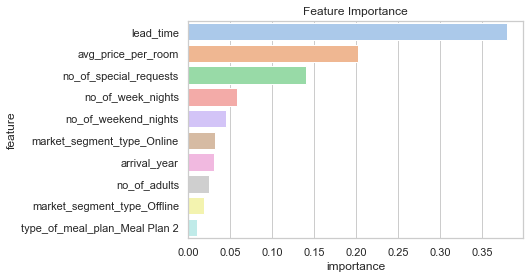

In [172]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');